# Решающие деревья для задачи классификации

Давайте на конкретном примере разберем задачу классификации с помощью решающих деревьев. Попытаемся "разделить" пространство, в котором находится несколько облаков точек, и визуализируем как разделяющую поверхность, так и саму структуру дерева.

Для начала импортируем нужные модули для обучения деревьев, генерации данных, визуализации и оценки моделей.

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn import tree
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

A этот блок нам нужен для того, чтобы получить визуализацию дерева решений.

In [ ]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:50% !important;height:50% !important;}</style>"
# HTML('')
# HTML(style)

Для начала нам нужно сгенерировать набор случайных данных. Создадим множество точек, сгруппированных вокруг одного центра с помощью функции `make_blobs()`. Признаками этих данных будут координаты **x** и **y**.

In [ ]:
random_dots = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, random_state=1,
                                      cluster_std=(1.2,1.5,1,))

С помощью функции `train_test_split()` разделим сгенерированные данные на тренировочную и тестовую выборки.

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(random_dots[0], random_dots[1], test_size=0.3, random_state=0)

Давайте отрисуем нашу выборку на плоскости.

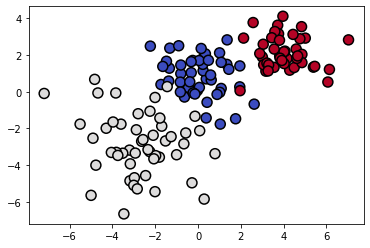

In [ ]:
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

Теперь построим модель. Для этого воспользуемся функцией `DecisionTreeClassifier()` из модуля *tree*. Для начала мы будем использовать параметры по умолчанию. И сразу же обучим наше дерево с помощью метода `fit()`. На вход передадим наши тренировочные данные.

In [ ]:
clf_tree = tree.DecisionTreeClassifier(random_state=1)
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Оценим качество нашей модели с помощью метрики *accuracy* и функции `accuracy_score()`, передав ей на вход предсказанные и реальные принадлежности к группам точек.

In [ ]:
predictions = clf_tree.predict(test_data)
accuracy_score(test_labels, predictions)

0.9

Давайте проверим, как отличается качество модели и вид разделяющей плоскости в зависимости от глубины дерева. Разделяющая плоскость поможет нам увидеть, как решающее дерево выделяет группы отдельных точек по их координатам. Для ее визуализации нам потребудется следующая функция.
Проанализировав, мы можем оценить, как меняется значение признаков наших объектов. В данном случае у нас два признака: координаты x и y. Поэтому, на основе всего набора данных, мы можем понять, в каких границах меняются x и y. А зная границы, мы можем получить набор точек, находящийся внутри квадрата.

In [9]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Для начала обучим простое решающее дерево глубиной 1. Передадим функции `DecisionTreeClassifier()` параметр `max_depth=1`

In [ ]:
clf_tree = tree.DecisionTreeClassifier(max_depth=1, random_state=1)
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Теперь визуализируем на одном графике наши точки и результат предсказания нашего дерева. Так как его глубина была равна 1, мы смогли проверить только одно условие, то есть отметить в пространстве область группировки красных и синих точек. Дерево больше не может "делиться", поэтому, область группировки серых точек не была отмечена.

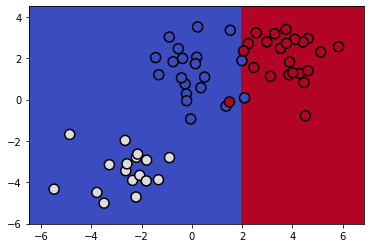

In [ ]:
xx, yy = get_grid(test_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

Визуализируем непосредственно дерево решений. Здесь мы сможем понять, по какому признаку формировалось разделяющее пространство. В начале у нас было 140 объектов (samples = 140): 47 одного класса, 50 другого, и 43 третьего (value = [47, 50, 43]). Затем было произведено разбиение объектов на 2 группы в зависимости от сравнения признака x со значением 1.958 (xx <= 1.958). Мы можем найти этот участок на визуализации выше на оси x.

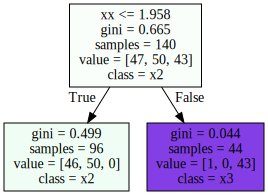

In [ ]:
graph = Source(tree.export_graphviz(clf_tree, out_file=None,
                                   feature_names=list(['xx', 'yy']),
                                   class_names=['x1','x2', 'x3'],
                                    filled = True))
display(SVG(graph.pipe(format='svg')))

Увеличим глубину нашего дерева до 2. Теперь мы сможем работать с двумя признаками: осями x и y, так что у нас получится выделить все три облака точек на разделяющей поверхности.

In [ ]:
clf_tree = tree.DecisionTreeClassifier(max_depth=2, random_state=1)
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

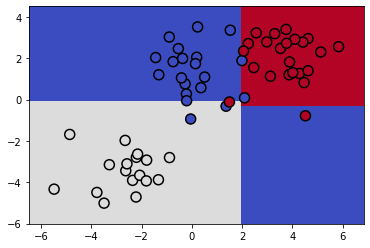

In [ ]:
xx, yy = get_grid(test_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

Первое разбиение в дереве происходит по тому же признаку x. Затем разбиение происходит сновва, уже по оси y.

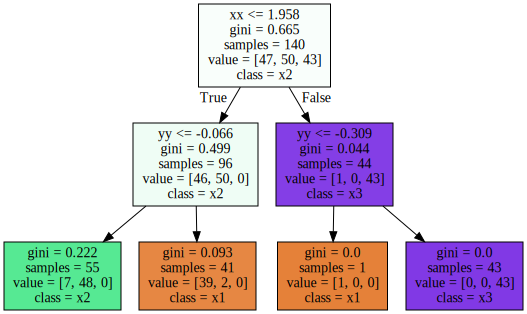

In [ ]:
graph = Source(tree.export_graphviz(clf_tree, out_file=None,
                                   feature_names=list(['xx', 'yy']),
                                   class_names=['x1','x2', 'x3'],
                                    filled = True))
display(SVG(graph.pipe(format='svg')))

Попробуем не ограничивать глубину дерева и посмотрим на результат.

In [ ]:
clf_tree = tree.DecisionTreeClassifier(random_state=1)
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Разделяющая поверхность получилась чрезмерно сложной, однако некоторые точки все равно оказались не в своей области. Поэтому, несмотря на то, что эффективность модели увеличивается с глубиной дерева, чрезмерная глубина не гарантирует качества предсказания.

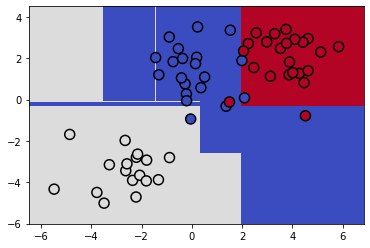

In [ ]:
xx, yy = get_grid(test_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

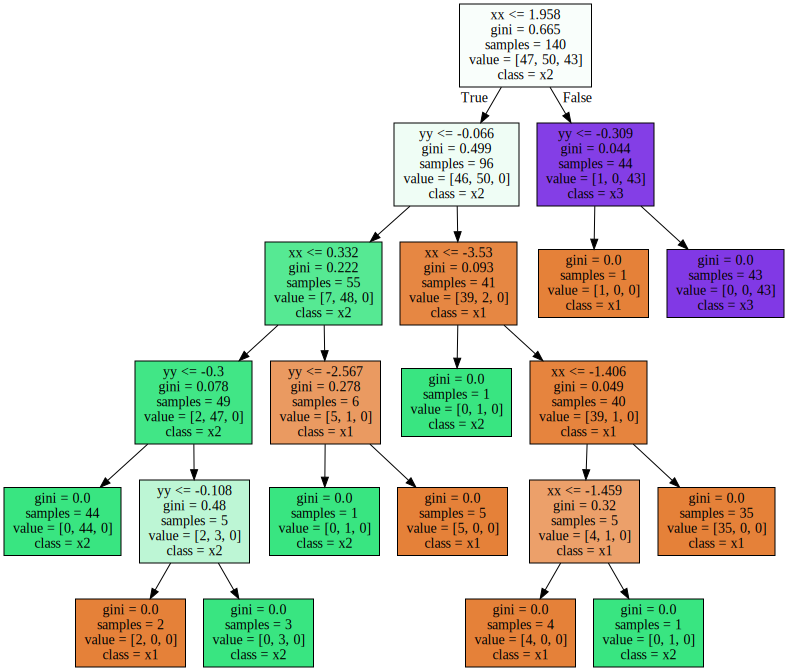

In [ ]:
graph = Source(tree.export_graphviz(clf_tree, out_file=None,
                                   feature_names=list(['xx', 'yy']),
                                   class_names=['x1','x2', 'x3'],
                                    filled = True))
display(SVG(graph.pipe(format='svg')))

## Классификация банкнот

Вам предложен датасет с некоторыми характеристиками банкнот, по которым мы будем определять, является ли банкнота фальшивой или настоящей.

Более подробную информацию про датасет, а также сам датасет можно найти [здесь](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). Также можете его скачать напрямую по этой [ссылке](https://lms.skillfactory.ru/assets/courseware/v1/ad29ebf5005123a0f5f50399a7bb64fb/asset-v1:SkillFactory+DS-MASTERS+01SEPT2020+type@asset+block/bill_authentication.csv).

Параметры решающего дерева, которые понадобятся для решения задачи:

- `max_depth` — максимальная глубина дерева.
- `max_features` — максимальное число признаков, по которым ищется лучшее разбиение в дереве. Это нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.
- `min_samples_leaf` — минимальное число объектов в листе. У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов.



In [1]:
from sklearn import tree
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Задание 2.2

Обучите на предложенных данных решающее дерево. Целевой переменной здесь является переменная `Class`. Размер тестовой выборки возьмите за 0.2, `random_state = 17` для разбиения и дерева. Максимальную глубину дерева примите за 3, максимальное число признаков, по которым ищется лучшее разбиение в дереве — за 2. Какое значение *f1-score* вы получили? 

Округлите до трёх знаков после точки-разделителя.

In [2]:
df = pd.read_csv('data/bill_authentication.csv')
df.head(5)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
features = df.drop(['Class'], axis=1).values
labels = df['Class'].values

train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=17)

In [4]:
solver = tree.DecisionTreeClassifier(max_depth=3, max_features=2, random_state=17)
solver.fit(train_data, train_labels)

predictions = solver.predict(test_data)
score = f1_score(test_labels, predictions)

print(f'f1: {score:.3f}')

f1: 0.866


### Задание 2.3

Проклассифицируйте банкноту с вектором признаков `2.04378,-0.38422,1.437292,0.76421`. К какому классу она относится?

In [5]:
solver.predict(np.array([
    [2.04378,-0.38422,1.437292,0.76421]
]))

array([0])

---

Здесь приведена **визуализация** того, как одно решающее дерево разделяет выборку, состоящую из **трёх классов**.

Видно, что решающее дерево может очень неплохо отделить каждый класс от всех остальных. Разделяющая поверхность каждого класса кусочно-постоянная, и при этом каждая сторона поверхности параллельна оси координат, так как каждое условие сравнивает значение ровно одного признака с порогом.

В то же время решающее дерево вполне может переобучиться: его можно сделать настолько глубоким, что каждый лист решающего дерева будет соответствовать ровно одному объекту обучающей выборки. В этом случае, если записать в каждом листе ответ соответствующего объекта, на обучающей выборке получается нулевая ошибка. Дерево получается явно **переобученным**. Пример такого дерева:

In [10]:
RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=100, centers=[(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(5,5))


clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

<ipython-input-10-0cf8541efd44>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')


MemoryError: Unable to allocate 344. MiB for an array with shape (11266164, 4) and data type float64

<Figure size 432x288 with 1 Axes>

## Решающие деревья в задаче регрессии

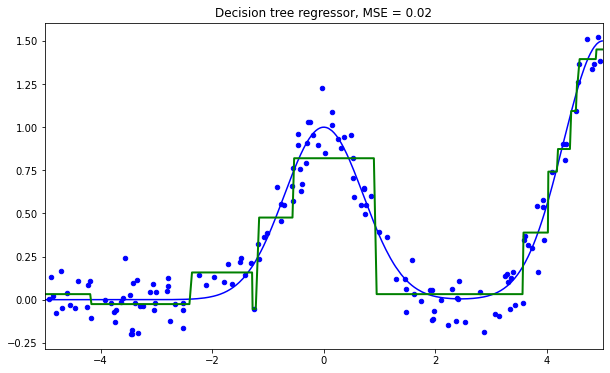

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=RANDOM_SEED)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.mean((y_test - reg_tree_pred) ** 2))
plt.show()

## Борьба с переобучением (регуляризация)

Приведём несколько возможных способов сделать алгоритм более обобщающим, т.е. менее заточенным под конкретную выборку:

- Задать порог по мере неопределённости: $ I(S) \leq \theta $
- Задать порог по размеру узла: $ \left |S \right | \leq n $
- Задать порог на глубину: $ Depth(T)=d $
- Задать порог на размер потомков $ Depth(T)=d $, здесь $S$ — это узел дерева, $T$ — дерево, $\left |S \right |$ — количество элементов в узле, $S_L, S_R$ — соответственно правый и левый потомок узла $S$.

## Задача о потреблении топлива

Потренируемся реализовывать задачу регрессии с помощью решающих деревьев на реальных данных. В данной задаче мы попробуем предсказать потребление топлива.

### Задание 2.4

Обучите решающее дерево для регрессии на предложенных данных, размер тестовой выборки возьмите за 0.3, `random_state = 42` для разбиения и дерева. Вычислите *RMSE*, округлите до двух знаков после точки-разделителя.

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [45]:
df = pd.read_csv('data/petrol_consumption.csv')
df.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [46]:
x = df.drop(['Petrol_Consumption'], axis=1).values
y = df['Petrol_Consumption'].values

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [52]:
solver = DecisionTreeRegressor(random_state=42)

solver.fit(x_train, y_train)
y_pred = solver.predict(x_test)

In [53]:
mse = mean_squared_error(y_test, y_pred)

In [56]:
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')

RMSE: 87.97


In [57]:
solver.get_depth()

11

## Построение решающих деревьев

todo

https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DS-MASTERS+01SEPT2020/courseware/8e926b6ac18941eda9b6434b85fa8513/07010d7ee696496798f67c07dbc78226/2?activate_block_id=block-v1%3ASkillFactory%2BDS-MASTERS%2B01SEPT2020%2Btype%40vertical%2Bblock%401ad7ec154de44c8b83f2c77fc62776db

## Ансамбль моделей (Бэггинг)

*Bagging* — это параллельный способ построения ансамбля. Коротко о способе построения:

- Обучающая выборка сэмплируется $k$ раз с помощью *bootstrap* (выбор с возвращением).
- На каждом сэмпле обучается отдельная базовая модель.
- Ответы моделей усредняются (возможно, с весами).

Необходимость бэггинга может возникнуть тогда, когда вы уже нашли хорошую модель, и никак больше не можете повысить ее качество. В этом случае можно перейти к более продвинутой истории: использовать не одну модель (пусть и очень хорошую!), а ансамбли моделей. Под термином *ансамбли* понимается ряд продвинутых техник машинного обучения, о которых мы поговорим далее.

**Пример: теорема Кондорса**

Проиллюстрируем идею ансамблей на известном примере — теореме Кондорса о жюри присяжных, которая датируется аж 1784 годом! 

Представим, что у нас есть несколько членов жюри, мнение каждого из них независимо от мнения других. Мы не знаем, какая вероятность принятия верного решения у каждого члена жюри. Однако мы понимаем, что если вероятность принять правильное решение у какого-то члена жюри больше, чем , то и общая вероятность принять верное решение возрастает. И наоборот, если вероятность принять правильное решение у какого-то члена жюри меньше, чем , то общая вероятность принять верное решение падает.


## Задача о винах

Реализуем бэггинг для деревьев решений. Для тренировки будем использовать датасет о винах. 

Для начала подготовим данные к классификации. Условно разделим вино на хорошее и нет. Хорошим вином будем называть вино, параметр *quality* которого не менее 6.

Теперь сравним несколько методов классификации: логистическую регрессию, решающее дерево и бэггинг.

Разбейте выборку на обучающую и тренировочную с параметрами `test_size=0.30`, `random_state=42`.

Обучите два классификатора: логистическую регрессию (с дефолтными параметрами) и решающее дерево (`random_state=42`, максимальная глубина равна 10).

### Задание 5.2

Введите значение *f1-score* для классификатора, который показал наилучшее значение. Округлите до трёх знаков после точки-разделителя.

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [152]:
df = pd.read_csv('data/winequality-red.csv', sep=';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [147]:
df['quality'] = (df['quality'] >= 6).astype(int)

In [148]:
x = df.drop(['quality'], axis=1).values
y = df['quality'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [149]:
solver_logreg = LogisticRegression(solver='lbfgs', max_iter=800)
solver_logreg.fit(x_train, y_train)

y_pred = solver_logreg.predict(x_test)

f1 = f1_score(y_test, y_pred)
print(f'F1: {f1:.3f}')

F1: 0.745


In [150]:
solver_dt = DecisionTreeClassifier(max_depth=10, random_state=42)
solver_dt.fit(x_train, y_train)

y_pred = solver_dt.predict(x_test)

f1 = f1_score(y_test, y_pred)
print(f'F1: {f1:.3f}')

F1: 0.793


Обучите модель с использование бэггинга (функция *BaggingClassifier* с `random_state=42`, разделение выборки на обучающую и тренировочную с параметрами `test_size=0.30`, `random_state=42`) для алгоритма, показавшего лучшее качество, определите количество моделей 1500. Вычислите новое значение *f1-score*.

In [151]:
solver_bagging = BaggingClassifier(base_estimator=solver_dt, n_estimators=1500, random_state=42)
solver_bagging.fit(x_train, y_train)

y_pred = solver_bagging.predict(x_test)

f1 = f1_score(y_test, y_pred)
print(f'F1: {f1:.3f}')

F1: 0.818


In [145]:
solver_bagging = BaggingClassifier(n_estimators=1500, random_state=42)
solver_bagging.fit(x_train, y_train)

y_pred = solver_bagging.predict(x_test)

f1 = f1_score(y_test, y_pred)
print(f'F1: {f1:.3f}')

F1: 0.816


## Случайный лес

Решающие деревья являются хорошим семейством базовых классификаторов для бэггинга, поскольку они достаточно сложны и могут достигать нулевой ошибки на любой выборке. 

**Метод случайных подпространств** позволяет снизить коррелированность между деревьями и избежать переобучения. Базовые алгоритмы обучаются на различных подмножествах признакового описания, которые также выделяются случайным образом. Над классическим бэггингом над деревьями решений, который мы рассмотрели в прошлом уроке, они имеют ряд преимуществ, заключающихся в возможности более точной настройки параметров модели.

**Алгоритм для ансамбля моделей, использующих метод случайного подпространства**

Ансамбль моделей, использующих метод случайного подпространства, можно построить, используя следующий алгоритм:

- Пусть количество объектов для обучения равно $N$, а количество признаков $D$.
- Выберите $L$ как число отдельных моделей в ансамбле.
- Для каждой отдельной модели $l$ выберите $dl$, $dl < D$ как число признаков для $l$. Обычно для всех моделей используется только одно значение $dl$.
- Для каждой отдельной модели $l$ создайте обучающую выборку, выбрав $dl$ признаков из $D$, и обучите модель.
- Теперь, чтобы применить модель ансамбля к новому объекту, объедините результаты отдельных $L$ моделей мажоритарным голосованием или путем комбинирования апостериорных вероятностей.

**Алгоритм построения случайного леса, состоящего из деревьев**

- сгенерировать выборку с помощью бутстрэпа;
- построить решающее дерево по выборке: по заданному критерию мы выбираем лучший признак, делаем разбиение в дереве по нему и так до исчерпания выборки → дерево строится, пока в каждом листе не более объектов или пока не достигнем определенной высоты дерева → при каждом разбиении сначала выбирается несколько случайных признаков из исходных, и оптимальное разделение выборки ищется только среди них.

Итоговый классификатор $ a(x)= \frac {1}{N} \sum_{i=1}^{N} b_i(x) $, иными словами — для задачи классификации мы выбираем решение голосованием по большинству, а в задаче регрессии — средним.

Рекомендуется в задачах классификации брать $ m= \sqrt{(n)} $, а в задачах регрессии — $ m= \frac{n}{3} $

, $n$ где — число признаков, а $m$ – количество случайно выбираемых признаков из множества всех исходных признаков. Также рекомендуется в задачах классификации строить каждое дерево до тех пор, пока в каждом листе не окажется по одному объекту, а в задачах регрессии — пока в каждом листе не окажется по пять объектов.

Таким образом, **случайный лес — это бэггинг** над решающими деревьями, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков.

## Реализация на Python и подбор параметров. Предсказание погоды

Теперь обучим случайный лес на простых данных и посмотрим, как можно подбирать параметры случайного леса для достижения наилучшего качества модели.

Откроем его, удалим признаки, не относящиеся к предсказанию (от дня недели, например, или от года погода не зависит), разделим на тестовую и обучающуюся выборки: 

In [153]:
df = pd.read_csv('data/temps_extended.csv')
df.head(5)

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [154]:
y = df['actual']
x = df.drop(['actual','weekday','month','day','year'], axis=1)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

Попробуем подобрать гиперпараметры таким образом, чтобы получить оптимальный результат.

Если мы запускаем случайный лес без настройки параметров, то по умолчанию они следующие:

In [155]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Параметры по умолчанию:\n')
pprint(rf.get_params())

Параметры по умолчанию:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Попробуем подбирать разные значения для некоторых параметров. Для перебора вариантов возьмем следующие параметры:

- n_estimators 
- max_features 
- max_depth 
- min_samples_split 
- min_samples_leaf
- bootstrap

Мы можем сами указать, какие значения гиперпараметров надо перебрать.

Зададим сетку гиперпараметров, которые будут перебираться:

In [156]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Обучим наш лес:

In [158]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
)
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

Давайте посмотрим, какие гиперпараметры нам предлагают как оптимальные: 

In [159]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

### Задание 6.1

Обучите случайный лес с предустановленными параметрами и теми параметрами, которые мы отобрали как оптимальные. В обоих вариантах поставьте `random_state=42`. Какое улучшение *MSE* дала подстановка отобранных гиперпараметров? Округлите до одного знака после запятой.

In [178]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_val)
mse1 = mean_squared_error(y_val, y_pred)

In [179]:
rf = RandomForestRegressor(
    random_state=42,
    n_estimators=800,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=90,
    bootstrap=True,
)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_val)
mse2 = mean_squared_error(y_val, y_pred)

In [180]:
mse1 - mse2

1.4725150522079282

## 7. Практика

Разберёмся с **ансамблями алгоритмов** и со **случайным лесом**. Рассмотрим данные о сотрудниках компании, где указывается, ушёл сотрудник или нет.

In [182]:
df = pd.read_csv('data/HR-dataset.csv')
df.head(5)

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,1001,0.38,0.53,2,157,3,0,1,0,sales,low
1,1002,0.80,0.86,5,262,6,0,1,0,sales,medium
2,1003,0.11,0.88,7,272,4,0,1,0,sales,medium
3,1004,0.72,0.87,5,223,5,0,1,0,sales,low
4,1005,0.37,0.52,2,159,3,0,1,0,sales,low


Сделаем **базовую предобработку данных**: удалим признак, который отвечает за идентификатор пользователя как нерепрезетативный признак.

In [183]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

target = 'left'
features = df.columns.drop(target)
features = features.drop('empid')  # Удалим идентификатор пользователя как нерепрезентативный признак

print(features)

X, y = df[features].copy(), df[target]

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')


Заменим идентификатор отдела, к которому относился сотрудник, на количество людей в отделе, а зарплату — на ординальную категорию. Масштабируем признаки для последующего сравнения результатов.

In [184]:
salary_ordinals = {'low': 1, 'medium': 2, 'high': 3}

X['dept'] = X['dept'].apply(X['dept'].value_counts().get)
X['salary'] = X['salary'].apply(salary_ordinals.get)

In [185]:
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

В дальнейшем будем оценивать качество модели на кросс-валидации на пяти фолдах при помощи F-меры.

In [186]:
def estimate_accuracy(clf, X, y, cv=5):
    return cross_val_score(clf, X, y, cv=5, scoring='f1').mean()

Посмотрим на то, как работает бэггинг над решающими деревьями.

>Бэггинг (bagging, сокр. от bootstrap aggregating)  — метод построения композиции алгоритмов, в котором каждый алгоритм строится независимо от других на подвыборках обучающей выборки. Итоговый алгоритм принимает решения посредством голосования среди всех алгоритмов (возвращается самый частый ответ).

Посмотрим на точность одного дерева.

In [187]:
tree = DecisionTreeClassifier(max_depth=30)
print("Decision tree:", estimate_accuracy(tree, X, y))

Decision tree: 0.9450045314500757


Проведём бэггинг: для этого достаточно обернуть исходный классификатор в *BaggingClassifier*.

In [188]:
bagging_trees = BaggingClassifier(tree)
print("Decision tree bagging:", estimate_accuracy(bagging_trees, X, y))

Decision tree bagging: 0.9745837353643367


Композиция отдельных деревьев показывает себя лучше, чем одно дерево. Структура дерева серьёзно зависит от обучающей выборки. Это значит, что если немного изменить обучающую выборку, то дерево сильно изменится. Бэггинг идеально подходит в этом случае, поскольку композиция алгоритмов при помощи голосования работает наилучшим образом, когда модели различны.

Увеличить различность построенных деревьев можно, указав параметры *max_features* и *max_depth*.

In [189]:
random_tree = DecisionTreeClassifier(max_features=int(np.sqrt(len(features))), max_depth=30)
print("Random tree:", estimate_accuracy(random_tree, X, y))

Random tree: 0.9540713833978115


In [190]:
bagging_random_trees = BaggingClassifier(random_tree)
print("Random tree bagging:", estimate_accuracy(bagging_random_trees, X, y))

Random tree bagging: 0.9791073387690844


Именно так внутри и работает так называемый **случайный лес** *(Random Forest)*: он обучает набор деревьев (параметр n_esimators), каждое из которых обучается на подмножестве признаков *(Random Subspaces)* и на подмножестве объектов *(bootstrap)*. То есть случайный лес получается случайным по двум этим параметрам, а ответы аггрегируются при помощи голосования.

> Стандартная эвристика: в задаче классификации брать квадратный корень числа признаков, а в задаче регрессии — треть числа признаков.


In [191]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    max_features=int(np.sqrt(len(features))),
    max_depth=30)
print("Random Forest:", estimate_accuracy(random_forest, X, y))

Random Forest: 0.9829834277014811


Ещё одно преимущество использования бэггинга для аггрегации моделей — получение **оценки** работы классификатора без дополнительного проведения кросс-валидации при помощи *out-of-bag score*. Это метод вычисления произвольной оценки качества во время обучения бэггинга. Для подсчёта требуется указать параметр `oob_score=True`, что имеет смысл при достаточном количестве деревьев.

In [192]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_features=int(np.sqrt(len(features))),
    max_depth=30,
    oob_score=True,
    n_jobs=-1
)
random_forest.fit(X, y)
random_forest.oob_score_.mean()

0.9929995333022201

Метод бэггинга можно применять к произвольным алгоритмам, например, к логистической регрессии. 

In [193]:
lr = LogisticRegression(solver='saga', max_iter=200)
lr.fit(X, y)
print("LR:", estimate_accuracy(lr, X, y))

LR: 0.44172459802488306


In [194]:
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

Bagging for LR: 0.4365451576623669


В её случае он не так сильно повышает качество, поскольку линейные модели не так сильно зависят от состава обучающей выборки. Попробуем убрать часть признаков.

In [195]:
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    max_features=0.5,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

Bagging for LR: 0.22025904904521182


В случае линейной регрессии повышение разнообразности моделей не дает такого прироста, как с деревьями, поскольку модели сильно теряют в качестве. Случайный лес на примере нашей задачи справляется лучше.

Сравнение логистической регрессии и случайного леса:

In [196]:
def plot_predictions(X, y, clf, proba=False, points_size=7, xlabel='x', ylabel='y'):
    """Fits the classifier on the data (X, y) and plots the result on a 2-D plane."""
    def get_grid(data):
        x_std, y_std = data.std(axis=0)
        x_min, x_max = data[:, 0].min() - x_std / 2, data[:, 0].max() + x_std / 2
        y_min, y_max = data[:, 1].min() - y_std / 2, data[:, 1].max() + y_std / 2
        return np.meshgrid(np.linspace(x_min, x_max, num=200),
                           np.linspace(y_min, y_max, num=200))
    
    clf.fit(X, y)
    xx, yy = get_grid(X)
    if proba:
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
    plt.figure(figsize=(10.0, 10.0))
    plt.pcolormesh(xx, yy, predicted, cmap=plt.cm.coolwarm, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=points_size, cmap=plt.cm.coolwarm, alpha=0.90)
    plt.ylim([yy.min(),yy.max()])
    plt.xlim([xx.min(),xx.max()])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return clf

## Практика. датасет *digits*

1. Загрузите датасет *digits* с помощью функции `load_digits` из *sklearn.datasets* и подготовьте матрицу признаков $X$ и ответы на обучающей выборке $y$ (вам потребуются поля *data* и *target* в объекте, который возвращает `load_digits`). 
2. Информацию о датасете вы можете получить, обратившись к полю *DESCR* у возвращаемого объекта `load_digits`. Нам предстоит решать задачу классификации изображений с цифрами по численным признакам.
3. Для оценки качества мы будем использовать `cross_val_score` из *sklearn.model_selection* с параметром $cv=10$. Эта функция реализует *k-fold cross validation* c $k$ равным значению параметра $cv$. Предлагается использовать $k=10$, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и $k=5$. Функция *cross_val_score* будет возвращать `numpy.ndarray`, в котором будет $k$ чисел — качество в каждом из $k$ экспериментов *k-fold cross validation*. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод `.mean()` у массива, который возвращает *cross_val_score*.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадёт в диапазон, заданный для правильных ответов — в этом случае попробуйте перезапустить ячейку с *cross_val_score* несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Чтобы ускорить вычисление *cross_val_score*, следует попробовать использовать параметр *n_jobs*. Число, которое вы подаёте в качестве этого параметра, соответствует количеству потоков вашего процессора, которое будет задействовано в вычислении. Если указать `n_jobs = -1`, тогда будут задействовано максимальное число потоков.


In [197]:
from sklearn.datasets import load_digits

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [200]:
data = load_digits()
print(data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [203]:
x = data['data']
y = data['target']

### Задание 7.1

1. Создайте *DecisionTreeClassifier* с настройками по умолчанию и измерьте качество его работы с помощью *cross_val_score*.

Эту величину введите в поле для ответа (ваше значение должно попасть в заданный интервал).

In [204]:
solver = DecisionTreeClassifier()
solver.fit(x, y)

DecisionTreeClassifier()

In [208]:
cross_val_score(solver, x, y, cv=10).mean()

0.8219087523277467

2. Теперь давайте обучим *BaggingClassifier* на основе *DecisionTreeClassifier*. Из `sklearn.ensemble` импортируйте *BaggingClassifier*, все параметры задайте по умолчанию. Нужно изменить только количество базовых моделей, задав его равным 100.

В поле для ответа введите качество бэггинга на нашем датасете (ваше значение должно попасть в заданный интервал).

Подумайте, какие выводы можно сделать из соотношения качества одиночного дерева и бэггинга деревьев?